In [1]:
import torch
import os
import sys
import numpy as np
from dataloader import build_mit_swav, build_moseas
from model.MLP import MLP
import matplotlib.pyplot as plt

In [6]:
%load_ext autoreload
%autoreload 2

In [2]:
def partition_dataset(n, proportion=0.8):
	train_num = int(n * proportion)
	indices = np.random.permutation(n)
	train_indices, val_indices = indices[:train_num], indices[train_num:]
	return train_indices, val_indices

In [69]:
print('loading data...')
full_dataset=build_moseas()
# train_dataset=build_moseas()
# test_dataset=build_moseas()

loading data...
246
246


In [70]:
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [71]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
print('finish.')

finish.


In [72]:
model=MLP(input_size=17,hidden_size=50,output_size=7,epochs=10000)
print(model.network)

MLP_net(
  (layers): Sequential(
    (0): Linear(in_features=17, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=50, out_features=7, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=7, out_features=1, bias=True)
  )
)


In [73]:
print("TRAINING.")
mean_train_losses, mean_valid_losses,epoch_list=model.train(train_loader, test_loader)

print("TEST.")
test_losses=model.test(test_loader)
print("test loss:",np.mean(test_losses))

TRAINING.
Validation... epoch : 1, train loss : 0.7238, valid loss : 0.7750
Validation... epoch : 50, train loss : 0.3361, valid loss : 0.2624
Validation... epoch : 100, train loss : 0.3430, valid loss : 0.2578
Validation... epoch : 150, train loss : 0.3496, valid loss : 0.2485
Validation... epoch : 200, train loss : 0.2100, valid loss : 0.2424
Validation... epoch : 250, train loss : 0.2127, valid loss : 0.2407
Validation... epoch : 300, train loss : 0.2341, valid loss : 0.2391
Validation... epoch : 350, train loss : 0.1945, valid loss : 0.2408
Validation... epoch : 400, train loss : 0.1651, valid loss : 0.2391
Validation... epoch : 450, train loss : 0.1787, valid loss : 0.2361
Validation... epoch : 500, train loss : 0.2041, valid loss : 0.2360
Validation... epoch : 550, train loss : 0.2572, valid loss : 0.2344
Validation... epoch : 600, train loss : 0.1823, valid loss : 0.2351
Validation... epoch : 650, train loss : 0.1858, valid loss : 0.2386
Validation... epoch : 700, train loss : 0

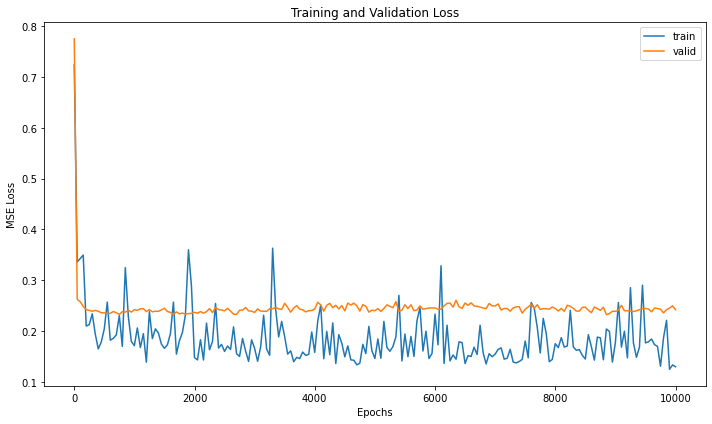

In [75]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax1.plot(epoch_list,mean_train_losses, label='train')
ax1.plot(epoch_list,mean_valid_losses, label='valid')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss")
fig.tight_layout()
plt.savefig("training_loss.png")